## **Importing Libraries**

In [ ]:
import pandas as pd
import html
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
a = pd.read_csv('/content/Youtube01-Psy.csv')
b = pd.read_csv('/content/Youtube02-KatyPerry.csv')
c = pd.read_csv('/content/Youtube03-LMFAO.csv')
d = pd.read_csv('/content/Youtube04-Eminem.csv')
e = pd.read_csv('/content/Youtube05-Shakira.csv')

In [ ]:
df = pd.concat([a,b,c,d,e], axis=0)
df.shape

(1956, 5)

In [ ]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


## **Data Cleaning**

In [ ]:
df.drop(['COMMENT_ID','AUTHOR','DATE'], axis = 1, inplace = True)
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
df['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [ ]:
df.isna().sum()

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
df["CONTENT"]=df["CONTENT"].apply(html.unescape)
df["CONTENT"]=df["CONTENT"].str.replace("\ufeff","")
df["CONTENT"]=df["CONTENT"].str.replace("(<a.+>)","htmllink")
df[df["CONTENT"].str.contains("<.+>")]["CONTENT"]
df["CONTENT"]=df["CONTENT"].str.replace(r"\S*\.com\S*|\S*watch\?\S*","htmllink")
df["CONTENT"]=df["CONTENT"].str.replace("\W"," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df

,CONTENT,CLASS
0,Huh anyway check out this you tube channel ...,1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say htmllink,1
3,me shaking my sexy ass on my channel enjoy _,1
4,htmllink Check this out,1
...,...,...
365,I love this song because we sing it at Camp al...,0
366,I love this song for two reasons 1 it is abou...,0
367,wow,0
368,Shakira u are so wiredo,0


## **Most Used words in Spam comments**

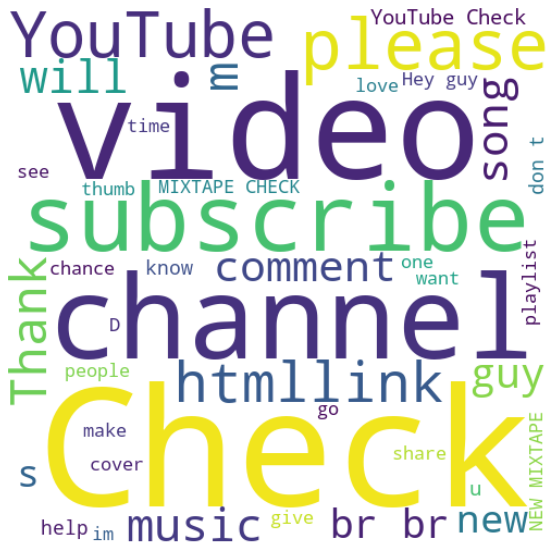

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')

mask = df[df['CLASS']== 1]['CONTENT']

spam_wc = wc.generate(' '.join([twts for twts in mask]))


plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc, interpolation= 'bilinear')

## **Word to Num**

In [ ]:
x = df["CONTENT"]
y = df["CLASS"]

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 1),
                     analyzer='word',
                     max_features = 3897,
                     vocabulary=None,
                     lowercase='True',
                     binary=False) 

x = cv.fit_transform(x).toarray()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1564, 3897)
(392, 3897)
(1564,)
(392,)


## **Model Building using Countvectorizer**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import *

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='newton-cg', penalty='l2')
rfc = RandomForestClassifier(n_estimators=70, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=28)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

    print('Accuracy Score = ',accuracy_score(y_test,y_pred))
    print('precision Score = ',precision_score(y_test,y_pred))
    print('recall Score = ',recall_score(y_test,y_pred))

In [ ]:
print('----------------------SVM-------------------------')
print('--------------------------------------------------')
train_classifier(svc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('----------------------KNN-------------------------')
print('--------------------------------------------------')
train_classifier(knc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('-----------------Decision Tree--------------------')
print('--------------------------------------------------')
train_classifier(dtc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('-------------Logistic regression------------------')
print('--------------------------------------------------')
train_classifier(lrc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('----------------Random Forest--------------------')
print('--------------------------------------------------')
train_classifier(rfc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('-------------------GussianNB---------------------')
print('--------------------------------------------------')
train_classifier(gnb,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('-------------------MultiNB----------------------')
print('--------------------------------------------------')
train_classifier(mnb,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('--------------------BournoliNB------------------')
print('--------------------------------------------------')
train_classifier(bnb,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('---------------------Adaboost-------------------')
print('--------------------------------------------------')
train_classifier(abc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')

----------------------SVM-------------------------
--------------------------------------------------
Accuracy Score =  0.6887755102040817
precision Score =  0.7281553398058253
recall Score =  0.6944444444444444
--------------------------------------------------
----------------------KNN-------------------------
--------------------------------------------------
Accuracy Score =  0.8928571428571429
precision Score =  1.0
recall Score =  0.8055555555555556
--------------------------------------------------
-----------------Decision Tree--------------------
--------------------------------------------------
Accuracy Score =  0.8826530612244898
precision Score =  0.967032967032967
recall Score =  0.8148148148148148
--------------------------------------------------
-------------Logistic regression------------------
--------------------------------------------------
Accuracy Score =  0.951530612244898
precision Score =  0.9900497512437811
recall Score =  0.9212962962962963
----------------

## **Best Model Logistic Regression with 95.1% Accuracy**

In [ ]:
lrc = LogisticRegression(solver='newton-cg', penalty='l2')
train_classifier(lrc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.951530612244898
precision Score =  0.9900497512437811
recall Score =  0.9212962962962963


In [ ]:
def predict(text):
  post = cv.fit_transform([text])
  result = lrc.predict(post)[0]

  if result == 0:
    print('Not Spam')
  else:
    print('spam')

In [ ]:
from sklearn.model_selection import GridSearchCV

para = {'n_estimators': [1,100], 'learning_rate': [0.1,1]}
abc = AdaBoostClassifier()

clf = GridSearchCV(abc,para)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

## **Model Building Using TFIDF**

In [ ]:
x = df["CONTENT"]
y = df["CLASS"]

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

x = tfidf.fit_transform(x).toarray()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1564, 3897)
(392, 3897)
(1564,)
(392,)


In [ ]:
print('----------------------SVM-------------------------')
train_classifier(svc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('----------------------KNN-------------------------')
train_classifier(knc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('-----------------Decision Tree--------------------')
train_classifier(dtc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('-------------Logistic regression------------------')
train_classifier(lrc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('----------------Random Forest--------------------')
train_classifier(rfc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('-------------------GussianNB---------------------')
train_classifier(gnb,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('-------------------MultiNB----------------------')
train_classifier(mnb,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('--------------------BournoliNB------------------')
train_classifier(bnb,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')
print('---------------------Adaboost-------------------')
train_classifier(abc,x_train,y_train,x_test,y_test)
print('--------------------------------------------------')

----------------------SVM-------------------------
Accuracy Score =  0.9438775510204082
precision Score =  0.985
recall Score =  0.9120370370370371
--------------------------------------------------
----------------------KNN-------------------------
Accuracy Score =  0.6428571428571429
precision Score =  1.0
recall Score =  0.35185185185185186
--------------------------------------------------
-----------------Decision Tree--------------------
Accuracy Score =  0.8826530612244898
precision Score =  0.9619565217391305
recall Score =  0.8194444444444444
--------------------------------------------------
-------------Logistic regression------------------
Accuracy Score =  0.923469387755102
precision Score =  0.9603960396039604
recall Score =  0.8981481481481481
--------------------------------------------------
----------------Random Forest--------------------
Accuracy Score =  0.9285714285714286
precision Score =  0.9795918367346939
recall Score =  0.8888888888888888
--------------------